In [1]:
import numpy as np
import pandas as pd 
import csv
import matplotlib.pyplot as plt
from matplotlib import*
from pandas import *



In [2]:
import astropy
from astropy import*
from astropy import units as u
from astropy import cosmology
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic 
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.ticker import LinearLocator, FormatStrFormatter
import corner

In [13]:
%cd
%cd Documents/summer2018/
%ls


/Users/chadharper
/Users/chadharper/Documents/summer2018
BLUR_Summer_2018_Abstract_Harper_Chad_.pdf
BLUR_Summer_2018_Introduction_Methods_Harper_Chad_.pdf
Background Investigation.pdf
DS_3.csv
Figures/
Galaxy Location(b,l).png
HubbleDiagram.png
MCMC15.py
Memorandum of understanding .pdf
Newdata2.csv
Papers/
SN_data.txt
SN_data.xlsx
SN_data_sim1_2.txt
SignalMatrix_3.dat
Simulated SN_data/
WorkPlan-BLUR Summer 2018-Harper, Chad.pdf
[Stephen_Abbott]_Understanding_Analysis_(with_Inst(BookZZ.org).pdf
dm1
dm2
dm3
fnsys-02-004.pdf
simulated_output1.dat
simulated_output2.dat
simulated_output3.dat
~$SN_data.xlsx


In [4]:
gcr = pd.read_csv("Newdata2.csv")


In [5]:

gcr2 = gcr.set_index("g_id", drop = False)
gcr2


,g_id,g_obs,dec_true,ra_true,z,z_true,stellar_mass,totalSFR,SNR,SNR_cumsum,Norm_SNR
g_id,,,,,,,,,,,
54467,54467,27.489330,-0.550410,-0.763351,0.137874,0.139708,1.436389e+06,4.992182e-01,6.364470e-04,6.364470e-04,2.260000e-13
31784,31784,19.030100,-1.045317,0.347900,0.123757,0.124232,3.099412e+10,9.997952e-03,9.459350e-04,1.582382e-03,5.610000e-13
3345,3345,23.824602,-1.445451,-2.437294,0.070021,0.070995,1.378786e+07,1.543952e+00,1.861856e-03,3.444238e-03,1.220000e-12
129065,129065,27.120420,-1.538755,-1.637398,0.197440,0.197779,9.471366e+06,1.815161e+00,2.169819e-03,5.614057e-03,1.990000e-12
119351,119351,26.151508,1.565020,-0.094872,0.189121,0.189853,2.444758e+07,2.175869e+00,2.579709e-03,8.193766e-03,2.900000e-12
88342,88342,26.542007,1.467262,-0.670975,0.167099,0.165900,1.034278e+07,2.181630e+00,2.583679e-03,1.077744e-02,3.820000e-12
13964,13964,24.373373,-0.150002,-1.924179,0.081025,0.081536,1.136722e+07,3.038854e+00,3.538859e-03,1.431630e-02,5.070000e-12
75024,75024,28.229679,-1.048271,-1.729988,0.183001,0.181998,1.622959e+06,3.049497e+00,3.548266e-03,1.786457e-02,6.330000e-12
121549,121549,26.557035,1.120549,-1.458801,0.186853,0.187694,1.427595e+07,4.283925e+00,4.903218e-03,2.276779e-02,8.070000e-12


In [6]:
t=gcr2["dec_true"].values
q=gcr2["ra_true"].values

cel=SkyCoord(ra=q*u.degree, dec=t*u.degree)
gal=cel.galactic
gcr2['l_true']=gal.l
gcr2['b_true']=gal.b


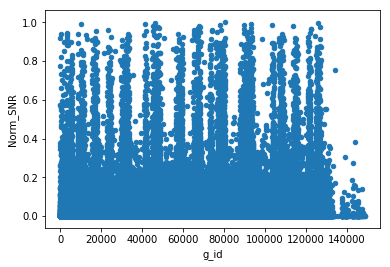

In [10]:
gcr2.plot.scatter(x="g_id",y="Norm_SNR")
plt.show()

In [11]:
rand_samp=gcr2.sample(n=1000,replace=True,random_state=1050,axis=0)
rand_samp2=gcr2.sample(n=10000,replace=True,random_state=1050,axis=0)
%cd Simulated\ SN_data
rand_samp2
rand_samp2.to_csv('rand_samp2.csv')

[Errno 2] No such file or directory: 'Simulated SN_data'
/Users/chadharper/Documents/summer2018/Simulated SN_data


In [14]:
%cd Figures/


/Users/chadharper/Documents/summer2018/Figures


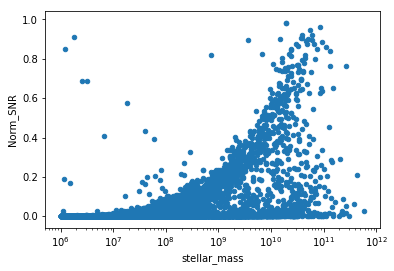

In [10]:
rand_samp2.plot.scatter(x="stellar_mass",y="Norm_SNR",logx=True)
plt.savefig('Normed_SNR by Steller mass (n=10000)')
plt.show()



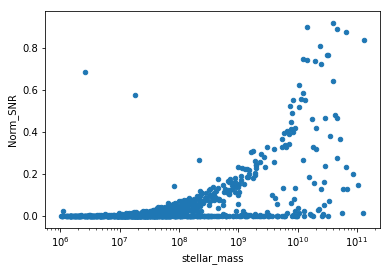

In [11]:
rand_samp.plot.scatter(x="stellar_mass",y="Norm_SNR",logx=True)
plt.savefig('Normed_SNR by Steller mass (n=1000)')
plt.show()


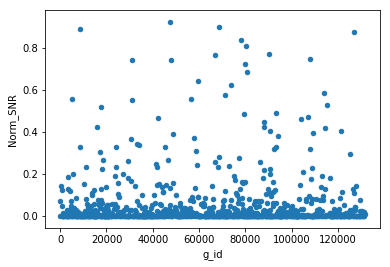

In [12]:
rand_samp.plot.scatter(x="g_id",y="Norm_SNR")

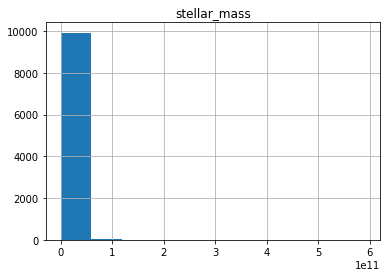

In [13]:
rand_samp2.hist(column="stellar_mass")
plt.savefig('Steller Mass Counts(n=10,000)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xb1719d630>]],
      dtype=object)

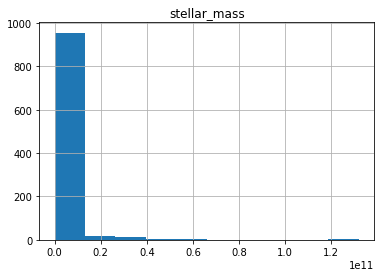

In [14]:
rand_samp.hist(column="stellar_mass")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xb17246828>]],
      dtype=object)

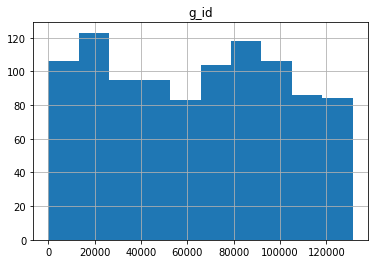

In [15]:
rand_samp.hist(column="g_id")

In [16]:
#For the following flux calculations we are going to use a mean absolute magnitude of the SNeIa of  -19.3 with
#With the assciated Planck15 cosmology 

In [15]:
from astropy.cosmology import Planck15 as cosmo


In [16]:
Mb_obs=-19.3
cosmo

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)

In [17]:
zt2=rand_samp2.loc[: , "z_true"]
rand_samp2["mu"]=cosmo.distmod(zt2)

In [18]:
zt=rand_samp.loc[: , "z_true"]

In [19]:
rand_samp["mu"]=cosmo.distmod(zt)
rand_samp

,g_id,g_obs,dec_true,ra_true,z,z_true,stellar_mass,totalSFR,SNR,SNR_cumsum,Norm_SNR,l_true,b_true,mu
g_id,,,,,,,,,,,,,,
68495,68495,24.933739,2.098093,-0.680557,0.182302,0.182331,4.145466e+07,5.748604e+06,3.247053e+03,4.174094e+07,1.479617e-02,96.737213,-57.992467,39.801387
17442,17442,23.457996,1.426303,-1.678177,0.108954,0.108242,9.376070e+07,6.488905e+03,5.145992e+00,1.690980e+04,5.990000e-06,94.495708,-58.198223,38.568793
117042,117042,24.921377,0.729861,1.379890,0.186889,0.189201,3.883598e+07,6.302061e+04,4.460809e+01,8.260663e+05,2.928210e-04,99.454241,-60.032090,39.890486
93452,93452,27.245258,0.025097,1.545090,0.174825,0.174911,2.058377e+06,4.979362e+05,3.178485e+02,3.305401e+06,1.171686e-03,99.258934,-60.749496,39.701580
88710,88710,26.296019,1.920780,1.073189,0.160443,0.159646,9.708201e+06,4.060485e+03,3.296511e+00,6.241161e+03,2.210000e-06,99.716182,-58.809573,39.483270
79235,79235,25.304026,-0.161214,1.358139,0.162306,0.161726,3.826879e+07,2.172383e+04,1.621791e+01,1.675266e+05,5.940000e-05,98.763696,-60.855790,39.514124
90288,90288,20.842003,0.154281,0.543854,0.168453,0.167865,9.770508e+09,4.520668e+05,2.899667e+02,3.123160e+06,1.107086e-03,97.466775,-60.258935,39.603114
33574,33574,25.594213,0.634735,1.079979,0.125805,0.127455,7.696598e+06,1.093716e+05,7.531207e+01,1.284873e+06,4.554570e-04,98.825713,-60.013194,38.950614
19743,19743,23.791590,2.300955,-2.497559,0.105575,0.104951,1.786269e+07,6.161006e+04,4.365904e+01,8.076539e+05,2.862940e-04,93.814100,-57.056938,38.497046


In [21]:
ep1=np.random.normal(loc=0,scale=0.08, size=1000)


In [22]:
ep2=np.random.normal(loc=0,scale=0.1,size=1000)


In [23]:
ep3= np.random.normal(loc=0,scale=0.12,size=1000)


In [24]:
Mb1=Mb_obs+ep1
Mb2=Mb_obs+ep2
Mb3=Mb_obs+ep3

In [25]:
mb_chart=pd.DataFrame(rand_samp.filter(["z_true","mu","z"]))


In [26]:
ep12=np.random.normal(loc=0,scale=0.08, size=10000)
ep22=np.random.normal(loc=0,scale=0.1,size=10000)
ep32= np.random.normal(loc=0,scale=0.12,size=10000)

Mb12=Mb_obs+ep12
Mb22=Mb_obs+ep22
Mb32=Mb_obs+ep32

mb_chart2=pd.DataFrame(rand_samp2.filter(["z_true","mu","z"]))
mb_chart2['mu_th']=cosmo.distmod(rand_samp2['z'])
mb_chart2["mb1"]=Mb12+mb_chart2['mu']
mb_chart2["mb2"]=Mb22+mb_chart2['mu']
mb_chart2["mb3"]=Mb32+mb_chart2['mu']
mb_chart2['m_th']=Mb_obs + mb_chart2['mu_th']
mb_chart2['sigma_m']=0


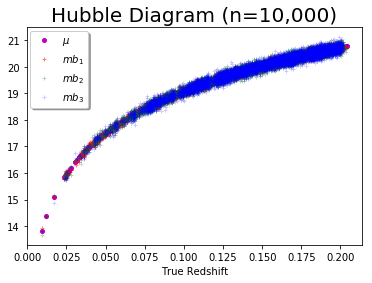

In [27]:
#Hubbel Plot
plt.plot(mb_chart2["z_true"],mb_chart2["mu"]-19.3,'m.',markersize=8)
plt.plot(mb_chart2["z_true"],mb_chart2["mb1"],'r+',markersize=4,alpha=.5,label="s=.08")
plt.plot(mb_chart2["z_true"],mb_chart2["mb2"],'g+',markersize=4, alpha=.3,label="s=.1" )
plt.plot(mb_chart2["z_true"],mb_chart2["mb3"],'b+',markersize=4, alpha=.2,label="s=.12" )
plt.xlabel('True Redshift')
plt.title('Hubble Diagram (n=10,000)', fontsize=20)
plt.legend(('$\mu$', '$mb_1$', '$mb_2$', '$mb_3$'),
           shadow=True, loc=(0.01, 0.63))
plt.savefig('HubbleDiagram(n=10,000).png')
plt.show()

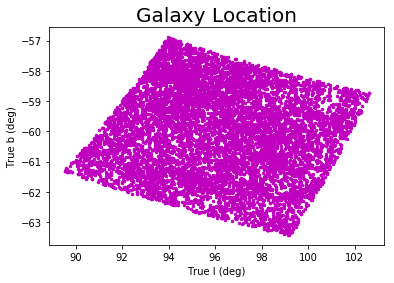

In [28]:
#Scatter of the galaxie in galatic coordiantes 
plt.plot(rand_samp2["l_true"],rand_samp2["b_true"],'m.',markersize=5)
plt.xlabel('True l (deg)')
plt.ylabel('True b (deg)')
plt.title('Galaxy Location', fontsize=20)
plt.savefig('Galaxy Location(b,l:n=10,000).png')
plt.show()

In [29]:
mb_chart['mu_th']=cosmo.distmod(rand_samp['z'])

In [30]:
mb_chart["mb1"]=Mb1+mb_chart['mu']
mb_chart["mb2"]=Mb2+mb_chart['mu']
mb_chart["mb3"]=Mb3+mb_chart['mu']
mb_chart['m_th']=Mb_obs + mb_chart['mu_th']
mb_chart['sigma_m']=0
mb_chart

,z_true,mu,z,mu_th,mb1,mb2,mb3,m_th,sigma_m
g_id,,,,,,,,,
68495,0.182331,39.801387,0.182302,39.800994,20.440914,20.525059,20.320764,20.500994,0
17442,0.108242,38.568793,0.108954,38.584051,19.280049,19.112350,19.533572,19.284051,0
117042,0.189201,39.890486,0.186889,39.860834,20.669506,20.641948,20.455852,20.560834,0
93452,0.174911,39.701580,0.174825,39.700406,20.350136,20.425397,20.364906,20.400406,0
88710,0.159646,39.483270,0.160443,39.495135,20.129209,19.934531,20.270816,20.195135,0
79235,0.161726,39.514124,0.162306,39.522673,20.238794,20.319151,20.162025,20.222673,0
90288,0.167865,39.603114,0.168453,39.611476,20.471441,20.389492,20.296229,20.311476,0
33574,0.127455,38.950614,0.125805,38.920027,19.701458,19.748137,19.590781,19.620027,0
19743,0.104951,38.497046,0.105575,38.510813,19.086025,19.181616,19.077393,19.210813,0


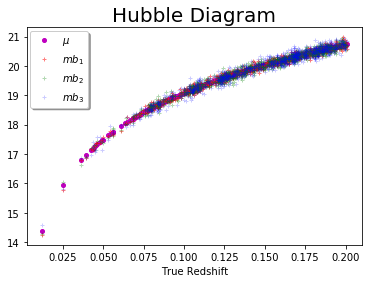

In [31]:
#Hubbel Plot
plt.plot(mb_chart["z_true"],mb_chart["mu"]-19.3,'m.',markersize=8)
plt.plot(mb_chart["z_true"],mb_chart["mb1"],'r+',markersize=4,alpha=.5,label="s=.08")
plt.plot(mb_chart["z_true"],mb_chart["mb2"],'g+',markersize=4, alpha=.3,label="s=.1" )
plt.plot(mb_chart["z_true"],mb_chart["mb3"],'b+',markersize=4, alpha=.2,label="s=.12" )
plt.xlabel('True Redshift')
plt.title('Hubble Diagram', fontsize=20)
plt.legend(('$\mu$', '$mb_1$', '$mb_2$', '$mb_3$'),
           shadow=True, loc=(0.01, 0.63))
#plt.savefig('HubbleDiagram.png')
plt.show()

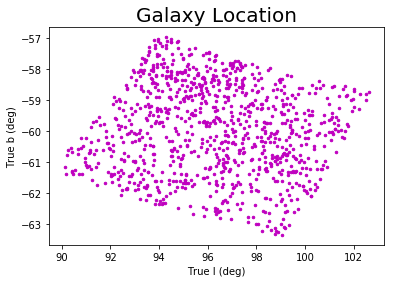

In [32]:
#Scatter of the galaxie in galatic coordiantes 
plt.plot(rand_samp["l_true"],rand_samp["b_true"],'m.',markersize=5)
plt.xlabel('True l (deg)')
plt.ylabel('True b (deg)')
plt.title('Galaxy Location', fontsize=20)
plt.savefig('Galaxy Location(b,l).png')
plt.show()


In [34]:
%ls


ALL Huterer Galaxy Location(b,l).png
First 208Galaxy Location(b,l).png
Galaxy Location(b,l).png
Galaxy Location(b,l:n=10,000).png
Galaxy Location(ra,Dec).png
HubbleDiagram(n=10,000).png
HubbleDiagram.png
Huterer Galaxy Location(b,l).png
Normed_SNR by Steller mass (n=1000).png
Normed_SNR by Steller mass (n=10000).png
Steller Mass Counts(n=10,000).png


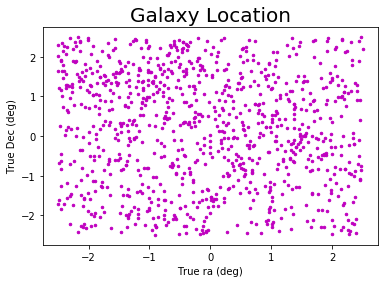

In [33]:
#Scatter of the galaxie in celistial coordiantes 
plt.plot(rand_samp["ra_true"],rand_samp["dec_true"],'m.',markersize=5)
plt.xlabel('True ra (deg)')
plt.ylabel('True Dec (deg)')
plt.title('Galaxy Location', fontsize=20)
#plt.savefig('Galaxy Location(ra,Dec).png')
plt.show()

In [34]:
%cd
%cd Documents
%cd summer2018/


/Users/chadharper
/Users/chadharper/Documents
/Users/chadharper/Documents/summer2018


In [37]:
Signal_Matrix = np.loadtxt('SignalMatrix_3.dat', unpack = True)

In [38]:
Signal_Matrix

array([[ 2.15986320e-01, -4.20649899e-02, -2.45025023e-02, ...,
         9.97429720e-05,  1.03058009e-04,  1.05962432e-04],
       [-4.20649899e-02,  2.15082425e-01,  9.55350098e-02, ...,
         4.11063353e-04,  4.07796386e-04, -4.86760435e-04],
       [-2.45025023e-02,  9.55350098e-02,  1.60028854e-01, ...,
         3.26984276e-04,  3.23345132e-04, -3.60003652e-04],
       ...,
       [ 9.97429720e-05,  4.11063353e-04,  3.26984276e-04, ...,
         5.75833826e-04,  4.80356980e-04, -1.58323615e-05],
       [ 1.03058009e-04,  4.07796386e-04,  3.23345132e-04, ...,
         4.80356980e-04,  5.74550450e-04, -1.58134280e-05],
       [ 1.05962432e-04, -4.86760435e-04, -3.60003652e-04, ...,
        -1.58323615e-05, -1.58134280e-05,  5.08163207e-04]])

In [39]:
Signal_Matrix.shape

(208, 208)

In [40]:
Inv_Sig=inv(Signal_Matrix)

In [36]:
#SN_data_sim1=pd.DataFrame(mb_chart.filter(["z",'mb1','sigma_m',]))
SN_data_sim1_2=pd.DataFrame(mb_chart2.filter(["z",'mb1','sigma_m',]))

In [37]:
#SN_data_sim1['l_true']=rand_samp['l_true']
#SN_data_sim1['b_true']=rand_samp['b_true']
#SN_data_sim1['m_th']=mb_chart['m_th']
SN_data_sim1_2['l_true']=rand_samp2['l_true']
SN_data_sim1_2['b_true']=rand_samp2['b_true']
SN_data_sim1_2['m_th']=mb_chart2['m_th']



In [38]:
SN_data_sim2_2=pd.DataFrame(mb_chart2.filter(["z",'mb2','sigma_m',]))
#SN_data_sim2['l_true']=rand_samp2['l_true']
#SN_data_sim2['b_true']=rand_samp2['b_true']
#SN_data_sim2['m_th']=mb_chart2['m_th']
SN_data_sim2_2['l_true']=rand_samp2['l_true']
SN_data_sim2_2['b_true']=rand_samp2['b_true']
SN_data_sim2_2['m_th']=mb_chart2['m_th']



In [39]:
#SN_data_sim3=pd.DataFrame(mb_chart.filter(["z",'mb3','sigma_m',]))
#SN_data_sim3['l_true']=rand_samp['l_true']
#SN_data_sim3['b_true']=rand_samp['b_true']
#SN_data_sim3['m_th']=mb_chart['m_th']


SN_data_sim3_2=pd.DataFrame(mb_chart2.filter(["z",'mb3','sigma_m',]))
SN_data_sim3_2['l_true']=rand_samp2['l_true']
SN_data_sim3_2['b_true']=rand_samp2['b_true']
SN_data_sim3_2['m_th']=mb_chart2['m_th']


In [45]:
%ls

BLUR_Summer_2018_Introduction_Methods_Harper_Chad_.pdf
Background Investigation.pdf
DS_3.csv
Figures/
Galaxy Location(b,l).png
HubbleDiagram.png
Memorandum of understanding .pdf
Newdata2.csv
Papers/
SN_data.txt
SignalMatrix_3.dat
Simulated SN_data/
WorkPlan-BLUR Summer 2018-Harper, Chad.pdf
[Stephen_Abbott]_Understanding_Analysis_(with_Inst(BookZZ.org).pdf
dm1
dm2
dm3
fnsys-02-004.pdf
simulated_output1.dat
simulated_output2.dat
simulated_output3.dat


In [90]:
%cd Simulated SN_data

/Users/chadharper/Documents/summer2018/Simulated SN_data


In [40]:
SN_data_sim1_2.to_csv('SN_data_Sim1_2.csv')
SN_data_sim2_2.to_csv('SN_data_sim2_2.csv')
SN_data_sim3_2.to_csv('SN_data_sim3_2.csv')

In [143]:
###Comments:

###sm is the cleaned matrix

###columnOnTheRight is the appended column (not yet appended)

###cpColumn is the copy of the above

s=SN_data_sim1_2.sort_values(by='z')
sm=np.matrix(s)
deleteIndex=[]
#ss=np.delete(sm,1,0)
#ss.shape
for i in range(9999):
    
    if sm[i+1,0]==sm[i,0] and sm[i+1,3]==sm[i,3]:
        deleteIndex.append(i)
#print(deleteIndex)

savedDeleteIndex=deleteIndex.copy()

columnforChad=[]
testS=np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6]])

testS.shape

lens=len(deleteIndex)

#for i in range(lens):
i=0

while True:
    start=deleteIndex[i]
    
    end=start
    while True:
        end=end+1
            
        if end==10000 or end not in deleteIndex:
            #end=end-1
            break
    average=0.0
    for j in range(start,end+1):
        average+=sm[j,1]
    average=average/(end-start+1)
    sm[start,1]=average
    for j in range(start+1,end+1):
        #print("YES!")
        sm=np.delete(sm,start+1,0)
    subtraction=end-start
    for j in range(len(deleteIndex)):
        #print("I'm here!",j,subtraction)
        deleteIndex[j]-=subtraction
    i=i+subtraction
    columnforChad.append((start,subtraction+1))
    if i>=lens:
        break
#print(columnforChad)
#print(deleteIndex)        
#51 52 53 60 65
newLens=len(sm)


#print(newLens)
def ifEverythingIsClean(sss):
    deleteInd=[]
    for i in range(len(sss)-1):
        if sss[i+1,0]==sss[i,0] and sss[i+1,3]==sss[i,3]:
            deleteInd.append(i)
    if deleteInd:
        return False
    return True

columnOnTheRight=[1]*newLens
for i in columnforChad:
    columnOnTheRight[i[0]]=i[1]

cpColumn=columnOnTheRight.copy()
print(ifEverythingIsClean(sm))


    


True


In [144]:
q=[1,2,3,4]

print(q)

for i in range(4):
    q[i]-=1
    
    
    
    
    
    
    
    
    
    
    
    
    
    
print(q)



[1, 2, 3, 4]
[0, 1, 2, 3]


In [173]:

#dfff=pd.DataFrame(sm)
#dfff.to_csv('SN_data_clean.txt',header=None, index=None, sep=' ', mode='a')
n=pd.DataFrame(cpColumn)
n.to_csv('n.txt',header=None, index=None, sep=' ', mode='a')

In [78]:
#SN_data_sim1_2.to_csv('SN_data_sim1_2.txt',header=None, index=None, sep=' ', mode='a')
writer = pd.ExcelWriter('SN_data.xlsx')

(SN_data_sim1_2.sort_values(by='z')).to_excel(writer, sheet_name='SN_data_sim1_2')
writer.save()

#SN_data_sim2_2.to_csv('SN_data_sim2_2.txt',header=None, index=None, sep=' ', mode='a')
#SN_data_sim3_2.to_csv('SN_data_sim3_2.txt',header=None, index=None, sep=' ', mode='a')




In [72]:
print((SN_data_sim1_2.sort_values(by='z')[:612
                                         ]))

              z        mb1  sigma_m      l_true     b_true       m_th
g_id                                                                 
13     0.008485  13.868219        0   93.715604 -61.886323  13.587305
21     0.011135  14.276198        0   93.024735 -61.922713  14.181681
46     0.016450  14.998913        0   98.651183 -61.431151  15.037764
147    0.023655  16.038622        0   92.362059 -60.264815  15.838253
80     0.023727  15.764605        0  102.336473 -58.887011  15.844967
137    0.023981  15.883353        0   95.254990 -57.892332  15.868488
251    0.024078  16.020930        0   98.121790 -59.550004  15.877429
103    0.024089  15.762895        0   94.964756 -60.128814  15.878420
123    0.024132  15.993552        0   97.180546 -58.785238  15.882394
125    0.024266  15.832360        0   93.974310 -58.153223  15.894609
203    0.024342  16.090675        0   92.469112 -61.331548  15.901536
235    0.024550  15.860605        0   92.398285 -58.957907  15.920344
134    0.024559  15.

In [49]:
%ls

SN_d1_b1.txt                 SN_data_sim3_2.csv
SN_d1_b2.txt                 SN_data_sim3_2.txt
SN_d1_b3.txt                 bin1_signal.dat
SN_d1_b4.txt                 bin2_signal.dat
SN_d1_s1.txt                 bin3_signal.txt
SN_d1_s2.txt                 bin4_signal.txt
SN_d1_s3.txt                 dm15
SN_data_sim1.txt             dm1_2
SN_data_sim1_2.txt           dm8
SN_data_sim2.txt             interactive_test_800_11.txt
SN_data_sim2_2.csv           newbin2output.txt
SN_data_sim2_2.txt


In [50]:

%cd

/Users/chadharper


In [51]:
%ls

A-plot.ipynb             Maximum_like_MCMC.ipynb  Testing.ipynb
Applications/            Movies/                  anaconda3/
Binning.ipynb            Music/                   lp.csv
Cleaner MCMC.ipynb       Pictures/                newdata1.csv
Desktop/                 Public/                  newdata2.csv
Documents/               README.md                objdir/
Downloads/               Rand_dist.ipynb          simulated_output3.dat
Gdata.csv                SNR_Calc1.ipynb
Library/                 Script MCMC.ipynb


In [52]:
%cd Documents/summer2018

/Users/chadharper/Documents/summer2018


In [53]:
%ls

BLUR_Summer_2018_Introduction_Methods_Harper_Chad_.pdf
Background Investigation.pdf
DS_3.csv
Figures/
Galaxy Location(b,l).png
HubbleDiagram.png
Memorandum of understanding .pdf
Newdata2.csv
Papers/
SN_data.txt
SignalMatrix_3.dat
Simulated SN_data/
WorkPlan-BLUR Summer 2018-Harper, Chad.pdf
[Stephen_Abbott]_Understanding_Analysis_(with_Inst(BookZZ.org).pdf
dm1
dm2
dm3
fnsys-02-004.pdf
simulated_output1.dat
simulated_output2.dat
simulated_output3.dat


In [54]:

#simulated_output1 = np.loadtxt('simulated_output1.dat', unpack = True)

In [55]:
simulated_output2 = np.loadtxt('simulated_output2.dat', unpack = True)
simulated_output3 = np.loadtxt('simulated_output3.dat', unpack = True)

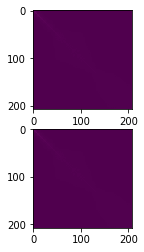

In [56]:
plt.subplot(211)
plt.imshow(simulated_output1*1000, cmap=plt.cm.BuPu_r)
plt.subplot(212)
plt.imshow(simulated_output2*1000, cmap=plt.cm.BuPu_r)
plt.show()

In [57]:
Axes3D.plot_surface(simulated_output1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

TypeError: plot_surface() missing 3 required positional arguments: 'X', 'Y', and 'Z'

In [ ]:
Huter_SN_data = np.loadtxt('SN_data.txt', unpack = False)

In [ ]:
Huter_SN_data

In [ ]:
Huter_SN_data.shape

In [ ]:
#Huter_SN_data=np.reshape(Huter_SN_data,(870,6),)

In [ ]:
Huter_SN_data=pd.DataFrame(Huter_SN_data)

In [ ]:
smdat=SN_data_sim1.head(208)


In [ ]:
#Scatter of the galaxie in galatic coordiantes 
plt.plot(smdat["l_true"],smdat["b_true"],'m.',markersize=5)
plt.xlabel('True l (deg)')
plt.ylabel('True b (deg)')
plt.title('Galaxy Location', fontsize=20)
plt.savefig('First 208Galaxy Location(b,l).png')
plt.show()

In [ ]:
#Scatter of the galaxie in galatic coordiantes 
plt.plot(Huter_SN_data[3],Huter_SN_data[4],'m.',markersize=5)
plt.xlabel('True l (deg)')
plt.ylabel('True b (deg)')
plt.title('Huterer Galaxy Location', fontsize=20)
#plt.savefig('Huterer Galaxy Location(b,l).png')
plt.show()

In [ ]:
#Scatter of the galaxie in galatic coordiantes 
plt.plot(Huter_SN_data[3],Huter_SN_data[4],'m.',markersize=5)
plt.xlabel('True l (deg)')
plt.ylabel('True b (deg)')
plt.title('Huterer Galaxy Location', fontsize=20)
#plt.savefig('ALL Huterer Galaxy Location(b,l).png')
plt.show()